<a href="https://colab.research.google.com/github/lee-yeonseo/study-ml-dl-with-alone-book/blob/main/basic_wk3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree (의사결정 나무)**

<img src="https://images.datacamp.com/image/upload/v1677504957/decision_tree_for_heart_attack_prevention_2140bd762d.png" width=500>

Decision Tree는 데이터의 독립변수에 대한 규칙을 순차적으로 적용하면서 분류하는 모델로, 마치 스무고개와 같은 원칙을 가지는 모델이다.

#### **작동 알고리즘**

Decision Tree는 최대한 좋은 성능을 내기 위해서 트리의 매 노드마다 특정 클래스가 가지는 공통된 특성을 파악하여 분할할 필요가 있다.<br>
따라서 불순도(imputity), 불확실성(uncertainty)를 최소화하는 방향으로 학습을 진행한다.<br>
불순도는 특정 클래스가 얼마나 섞여있는지를 나타내는 지표이기에, 데이터가 고르게 섞여있어 분류하기 어려울수록 불순도가 높다고 볼 수 있다.

Decision Tree에서는 불순도를 수치화한 후, **규칙을 적용하기 전후의 불순도 차를 최대화함으로써 현재 상황에서 정보 획득(information gain)을 최대화하는 규칙을 찾아 노드를 분할한다.** 이 규칙을 찾는 과정에서 최종적으로 하나의 독립변수가 선택되게 된다.

#### **데이터의 불확실성 지표**

<img src="https://ekamperi.github.io/images/decision_trees/gini_vs_entropy.png" width=500>

데이터의 불확실성을 나타내는 지표로는 대표적으로 엔트로피(entropy)와 지니계수(gini index)가 있다.

- 엔트로피(entropy) : &nbsp;&nbsp; $H(X) = -\sum_{i=1}^{n}p(x_i)\, \log \, p(x_i)$
    - $p(x_i)$ : 범주 $x_i$에 속하는 데이터의 비율

- 지니계수(gini index) : &nbsp;&nbsp; $gini(X) = 1 - \sum_{i=1}^{n}p(x_i)^2$
    - $p(x_i)$ : 범주 $x_i$에 속하는 데이터의 비율

- 정보획득(information gain) : &nbsp;&nbsp; $gain(x) = uncertainty(T) - uncertainty(T,x)$
    - $uncertainty$ : 데이터의 불확실성 지표
    - $T$ : target variable
    - $x$ : 데이터의 feature 중 하나
    - $uncertainty(T)$ : 분할 이전 데이터셋의 불확실성
    - $uncertainty(T|x)$ : 특성 $x$에 따라 데이터를 분할한 후의 불확실성

#### **Feature Importance (변수 중요도)**

- Decision Tree의 각 노드에서 얻은 Infomation Gain을 이용하여 계산
- 변수 중요도(feature importance) : &nbsp;&nbsp; $ f_{i} = \frac{\sum{1_{x=x_i}*gain}}{\sum{gain}}$
    - $x$ : 데이터의 feature 중 하나


변수 중요도는 결정 트리(Decision Tree)에서 각 특성이 모델의 예측에 기여하는 정도를 나타냅니다.  
특정 특성이 트리의 여러 노드에서 사용될 수 있으며, 해당 노드에서의 정보획득(Information Gain, IG)의 합을 기반으로 중요도를 계산합니다.

**기호 설명**
- $f_{i}$ : 변수 \( x_i \)의 중요도  
- $x$ : 데이터의 feature(변수) 중 하나  
- $1_{x = x_i}$ : 노드에서 분할에 사용된 특성이 \( x_i \)인지 여부 (해당하면 1, 아니면 0)  
- $gain$ : 해당 노드에서 계산된 정보획득(Information Gain)  
- $\sum{gain}$ : 모든 노드에서 계산된 정보획득의 총합  

---

**예제**
3개의 특성 $x_1, x_2, x_3$ 가 있는 데이터가 있으며,  
3개의 노드에서 분할이 일어났고, 각 노드에서의 정보획득(IG)은 다음과 같습니다.

| 노드  | 사용된 특성 | 정보획득 (IG) |
|------|-----------|--------------|
| 노드1 | \( x_1 \) | 0.4 |
| 노드2 | \( x_2 \) | 0.3 |
| 노드3 | \( x_1 \) | 0.2 |

총 정보획득:
$
\sum gain = 0.4 + 0.3 + 0.2 = 0.9
$

---

각 특성의 중요도 계산:

- $x_1$ 은 **노드1과 노드3**에서 사용됨 →  
  $
  \frac{(0.4 + 0.2)}{0.9} = 0.67
  $

- $x_2$ 는 **노드2**에서 사용됨 →  
  $
  \frac{(0.3)}{0.9} = 0.33
  $

- $x_3$ 는 **한 번도 사용되지 않음** →  
  $
  \frac{0}{0.9} = 0
  $

---

결과적으로 변수 중요도:

$
f_{1} = 0.67, \quad f_{2} = 0.33, \quad f_{3} = 0.0
$

즉,  
- **$x_1$이 가장 중요한 특성**이며,  
- **$x_3$은 모델의 분할에 전혀 사용되지 않음**을 알 수 있습니다.


#### **Pruning (가지치기)**

<img src="https://miro.medium.com/v2/resize:fit:1400/1*ElW-ERvIfiV6RSbs74RO_A.png" width="500">

Decision Tree에 하나의 데이터를 분류하기 위한 가지가 많으면 과적합(overfitting)의 가능성이 존재한다.<br>따라서 Decision Tree의 가지 수를 줄이는 방법을 통해 과적합을 방지할 수 있다.

- 사전 가지치기(pre-pruning) 방법이랑 사후 가지치기(post-pruning) 방법이 있다.
- Decision Tree의 최대 깊이 수, leaf 노드의 최소 데이터 개수 등을 조절하여 사전 가치치기를 할 수 있다.



**1. 사전 가지치기 (Pre-pruning)**
사전 가지치기는 트리를 생성하는 과정에서 미리 크기를 제한하여 트리가 너무 깊어지지 않도록 합니다.
즉, 트리가 특정 조건을 만족하면 더 이상 분할하지 않음으로써 모델이 너무 복잡해지는 것을 방지합니다.

방법
- 최대 깊이(max_depth) 제한 → 트리가 특정 깊이 이상으로 자라지 않도록 제한
- 리프 노드의 최소 샘플 개수(min_samples_leaf) 설정 → 한 리프 노드에 최소 몇 개의 데이터가 있어야 하는지 지정
- 노드를 분할할 최소 샘플 개수(min_samples_split) 설정 → 분할을 수행하기 위한 최소 데이터 개수를 지정
- 정보획득(Information Gain) 임계값 설정 → 특정 기준보다 정보획득이 낮으면 더 이상 분할하지 않음

**2. 사후 가지치기 (Post-pruning)**
사후 가지치기는 트리를 먼저 완성한 후, 과적합을 방지하기 위해 일부 노드를 제거하는 방식입니다.
즉, 완전한 트리를 만든 후 성능이 좋지 않은 분할을 제거하여 트리를 더 단순하게 만듭니다.

방법
- 에러 기반 가지치기(Error-based Pruning) → 가지치기 전후의 검증 데이터 성능을 비교하여 성능이 좋아지면 가지치기 수행
- 비용 복잡도 가지치기(Cost Complexity Pruning, CCP) → 트리의 크기에 따른 비용을 고려하여 불필요한 분할을 제거

DecisionTreeClassifier의 다양한 인자 확인 : [Decision Tree Classifier 공식 문서](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# load data
data = load_iris()

# train, test data split
X_train, X_test, y_train, y_test = train_test_split(data["data"], data["target"],
                                                    test_size=0.2, random_state=42, stratify=data["target"])

print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1, 2]), array([40, 40, 40]))
(array([0, 1, 2]), array([10, 10, 10]))


**Entropy를 활용한 분류**

In [ ]:
# make decision tree
entropy_dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

# fit decision tree
entropy_dt.fit(X_train, y_train)

# test decision tree
y_pred = entropy_dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"test accuracy : {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

test accuracy : 0.9333333333333333


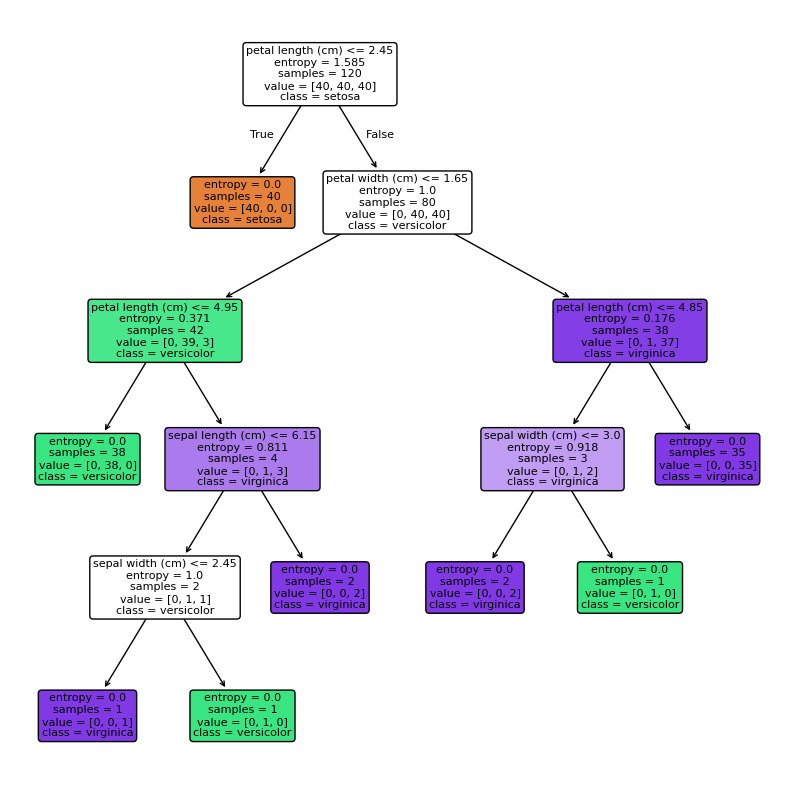

In [ ]:
# plot decision tree
plt.figure(figsize=(10, 10))
plot_tree(entropy_dt, filled=True, rounded=True, feature_names=data["feature_names"], class_names=data["target_names"])
plt.show()

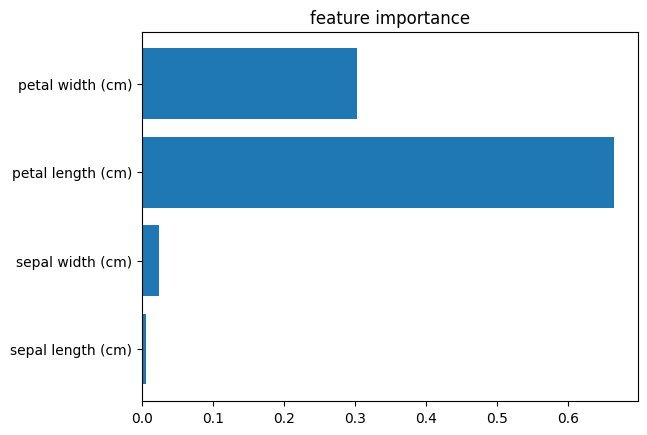

In [ ]:
# plot feature importance
plt.barh(data["feature_names"], entropy_dt.feature_importances_)
plt.title("feature importance")
plt.show()

**Gini Index를 활용한 분류**

In [ ]:
# make decision tree
gini_dt = DecisionTreeClassifier(criterion='gini', random_state=42)

# fit decision tree
gini_dt.fit(X_train, y_train)

# test decision tree
y_pred = gini_dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"test accuracy : {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

test accuracy : 0.9333333333333333


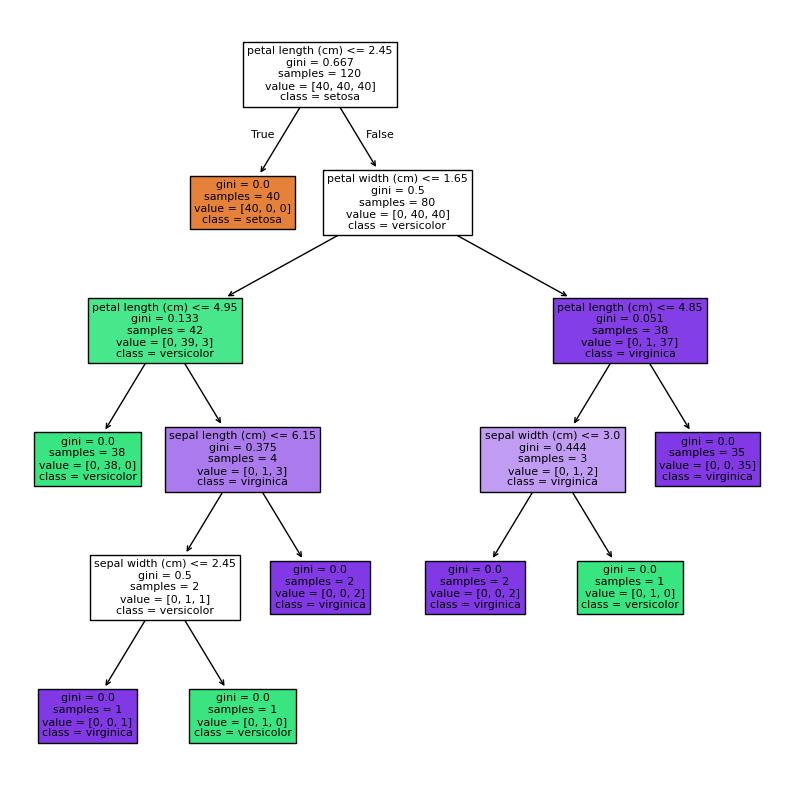

In [ ]:
# plot decision tree
plt.figure(figsize=(10, 10))
plot_tree(gini_dt, filled=True, feature_names=data["feature_names"], class_names=data["target_names"])
plt.show()

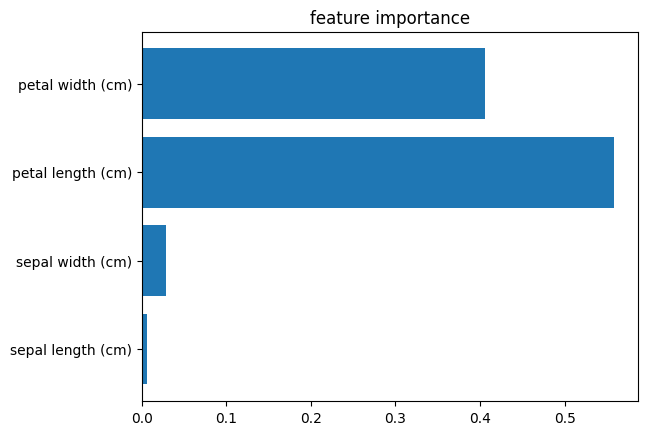

In [ ]:
# plot feature importance
plt.barh(data["feature_names"], gini_dt.feature_importances_)
plt.title("feature importance")
plt.show()

**Pruning 이용**

In [ ]:
# make decision tree
pruning_dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3, random_state=42)

# fit decision tree
pruning_dt.fit(X_train, y_train)

# test decision tree
y_pred = pruning_dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"test accuracy : {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

test accuracy : 0.9666666666666667


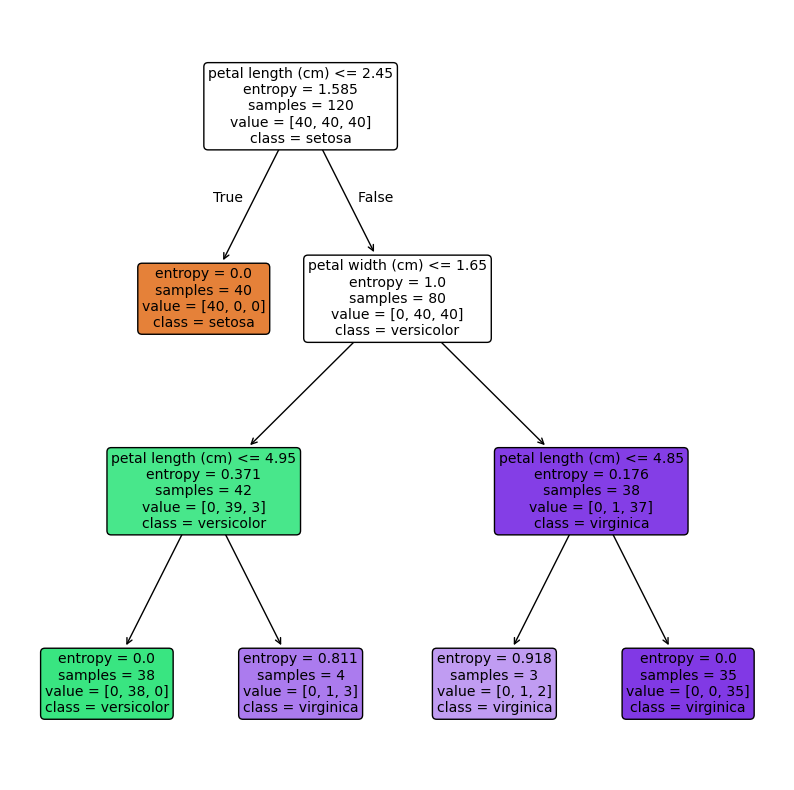

In [ ]:
# plot decision tree
plt.figure(figsize=(10, 10))
plot_tree(pruning_dt, filled=True, rounded=True, feature_names=data["feature_names"], class_names=data["target_names"])
plt.show()

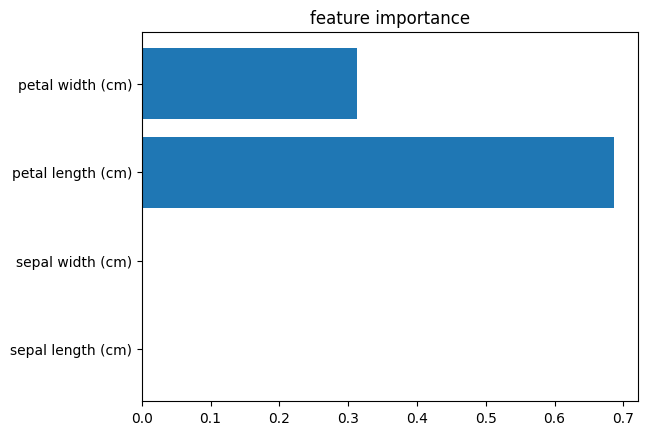

In [ ]:
# plot feature importance
plt.barh(data["feature_names"], pruning_dt.feature_importances_)
plt.title("feature importance")
plt.show()

# **Model Ensemble**

<img src="https://drive.google.com/uc?export=view&id=1N8tTC0bAf_Y03R41hHB06_gypMtJvlUf" width=500>

머신러닝에서 여러 모델을 합쳐 더 좋은 성능을 내는 새로운 모델을 만드는 기법을 앙상블이라 한다.<br>
각각의 모델은 다른 noise를 배울 것이고, 각각의 noise를 평균내면 0에 가까워질 것이라는 가정을 한다.

#### **Model Ensemble 종류**

<img src ="https://miro.medium.com/v2/resize:fit:1153/1*XzaoQxMf4uLD5DIHz8JwbA.png" width=600>

모델 앙상블의 방법으로는 대표적으로 Voting, Bagging, Boosting이 있다.

- Voting : 서로 다른 알고리즘을 가진 모델을 병렬로 결합한다.
    - Hard Voting : 모델이 예측한 결과값 중 가장 개수가 많은 결과값 선택한다.
    - Soft Voting : 각각의 모델이 예측한 클래스별 확률을 평균낸 후 가장 높은 확률을 가진 결과값을 선택한다.

- Bagging (Bootstrap Aggregating) : 같은 알고리즘으로 여러 개의 모델을 병렬적으로 만들어서 결합한다.
    - 훈련 데이터로부터 랜덤하게 복원추출하여 동일한 사이즈의 데이터셋을 여러개 만든다. (bootstrap)
    - 각각의 데이터셋으로 각각의 모델을 학습시킨 후 voting 방식으로 결과값을 선택한다. (aggregating)
    - 높은 variance를 낮추는데 유용하다. (과적합을 방지하는데 유용하다.)

- Boosting : 여러 개의 모델을 순차적으로 결합한다.
    - 현재 모델에서 틀린 결과값을 낸 데이터에 대해 큰 가중치를 부여한다.
    - 가중치가 부여된 데이터로 다음 모델이 예측함으로써 오류를 개선해나간다.
    - 각 모델들의 예측값을 가중합하여 결과값을 선택한다.
    - 높은 bias를 낮추는데 유용하다. (과소적합을 해결하는데 유용하다.)

**🗳 1. Voting (투표 기반 앙상블)**  

> 서로 다른 알고리즘을 가진 여러 모델을 병렬로 결합하여 최종 예측을 결정하는 방법  

**✔️ 방법:**  
1. 여러 개의 서로 다른 모델(예: 로지스틱 회귀, 랜덤 포레스트, SVM 등)을 학습  
2. 각 모델이 예측한 결과를 기반으로 최종 결정을 내림  

**✔️ 종류:**  
✅ **Hard Voting**  
- 모든 모델이 예측한 결과 중 **가장 많이 나온 결과(최빈값)** 를 최종 예측값으로 선택  
- 다수결 원칙을 따르는 방식  
- 예시:  
  | 모델 1 | 모델 2 | 모델 3 | 최종 예측값 (Hard Voting) |
  |--------|--------|--------|--------------------|
  | 🐶 강아지 | 🐱 고양이 | 🐶 강아지 | 🐶 강아지 (2표) |

✅ **Soft Voting**  
- 각 모델이 예측한 클래스별 **확률값을 평균** 낸 후, **가장 높은 확률을 가진 클래스**를 선택  
- 확률 기반으로 더 유연한 예측 가능  
- 예시:  
  - 모델 1: 강아지(0.6), 고양이(0.4)  
  - 모델 2: 강아지(0.3), 고양이(0.7)  
  - 모델 3: 강아지(0.8), 고양이(0.2)  
  - **Soft Voting 결과:** 강아지(0.57), 고양이(0.43) → 강아지가 최종 선택  

**✔️ 장점:**  
- 서로 다른 알고리즘을 사용하므로 **모델 간 보완 효과**가 큼  
- **Soft Voting**은 모델의 신뢰도를 반영할 수 있음  

**✔️ 단점:**  
- 개별 모델의 성능이 낮다면, 앙상블을 해도 성능이 좋지 않을 수 있음  
- Hard Voting은 **확률 정보를 반영하지 못함**  

---

**🛠 2. Bagging (Bootstrap Aggregating)**  

> 같은 알고리즘을 사용하여 여러 개의 모델을 병렬적으로 학습한 후, 결과를 결합하는 방법  

**✔️ 방법:**  
1. 훈련 데이터에서 **중복을 허용하여 샘플을 랜덤하게 선택** (Bootstrap 샘플링)  
2. 각각의 데이터 샘플을 이용해 **여러 개의 모델을 독립적으로 학습**  
3. 모든 모델의 예측을 **Voting 방식(Hard/Soft Voting) 또는 평균(Regression)** 으로 합쳐 최종 예측  

**✔️ 특징:**  
- 같은 모델을 사용하지만, **훈련 데이터가 달라서 서로 다른 모델이 생성됨**  
- 주로 **랜덤 포레스트(Random Forest)** 에서 사용됨  

**✔️ 장점:**  
- 높은 **분산(Variance)** 을 낮추는 효과 → 과적합(Overfitting) 방지  
- 개별 모델이 독립적이라 병렬 연산이 가능하여 학습 속도가 빠름  

**✔️ 단점:**  
- 데이터가 중복될 가능성이 있어 일부 데이터는 학습되지 않을 수도 있음  
- 개별 모델이 너무 유사하면 효과가 떨어질 수 있음  

**🚀 3. Boosting (부스팅)**  

> 여러 개의 모델을 **순차적으로 학습**하며, 이전 모델이 틀린 데이터를 집중적으로 학습하여 성능을 향상시키는 방법  

**✔️ 방법:**  
1. 첫 번째 모델을 학습한 후, **틀린 데이터를 강조**하여 다음 모델을 학습  
2. 새로운 모델이 기존 모델의 오차를 보완하도록 학습을 반복  
3. 최종적으로 여러 모델의 결과를 **가중 평균**하여 예측 수행  

**✔️ 특징:**  
- 이전 모델이 틀린 데이터에 가중치를 주고, **오류를 점점 줄이면서 학습**  
- 대표적인 알고리즘:  
  - **AdaBoost** (Adaptive Boosting)  
  - **Gradient Boosting (GBM)**  
  - **XGBoost** (Extreme Gradient Boosting)  
  - **LightGBM**  
  - **CatBoost**  

**✔️ 장점:**  
- 높은 **편향(Bias)** 을 줄이는 데 효과적 → 과소적합(Underfitting) 해결  
- 예측력이 뛰어나고, 최신 모델(XGBoost, LightGBM)은 속도도 빠름  

**✔️ 단점:**  
- 순차적 학습 방식이라 **병렬화가 어렵고 학습 속도가 느릴 수 있음**  
- 과적합 가능성이 있음 → 조기 종료(Early Stopping) 등의 기법 필요  


**🔥 Voting vs Bagging vs Boosting 비교**  

|  | Voting | Bagging | Boosting |
|---|--------|---------|---------|
| **모델 개수** | 여러 개 (다양한 알고리즘) | 여러 개 (같은 알고리즘) | 여러 개 (같은 알고리즘) |
| **학습 방식** | 병렬 학습 | 병렬 학습 | 순차적 학습 |
| **오류 보완 방식** | 다수결 / 평균 | 데이터 샘플을 다르게 사용 | 이전 모델의 오차를 보완 |
| **과적합 해결** | 낮음 | 효과적 (분산 감소) | 과적합 위험 존재 |
| **대표 알고리즘** | Hard/Soft Voting | 랜덤 포레스트(Random Forest) | XGBoost, AdaBoost, LightGBM |

---

# **Random Forest**

<img src="https://miro.medium.com/v2/resize:fit:1400/1*jE1Cb1Dc_p9WEOPMkC95WQ.png" width=500>

Random Forest는 여러 개의 Decision Tree를 Bagging의 방법으로 앙상블한 모델로,<br>
하나의 Decision Tree가 쉽게 과적합된다는 단점을 보완해준다.

#### **작동 알고리즘**

여러 개의 Decision Tree를 만들고 예측한 값들로 voting 방식을 이용하여 결과값을 도출해낸다.<br>
각각의 Decision Tree를 만드는 방법은 다음과 같다.
- Tree를 훈련시킬 데이터를 전체 데이터셋에서 bootstrap 방법으로 샘플링한다.
- 샘플링된 데이터를 이용하여 Decision Tree를 구축하는데, 각 노드별로 규칙을 찾을 때 전체 변수에서 랜덤으로 샘플링된 변수들만 이용한다.

RandomForestClassifier의 다양한 인자 확인 : [Random Forest Classifier 공식 문서](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# load data
data = load_breast_cancer()

# train, test data split
X_train, X_test, y_train, y_test = train_test_split(data["data"], data["target"],
                                                    test_size=0.2, random_state=42, stratify=data["target"])

print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1]), array([170, 285]))
(array([0, 1]), array([42, 72]))


In [ ]:
# make random forest
rf = RandomForestClassifier(bootstrap=True,             # 부트스트랩 샘플링 사용 여부
                            class_weight=None,          # 클래스별 가중치
                            criterion='gini',           # 불순도 측정 방법
                            max_depth=None,             # 트리의 최대 깊이
                            max_features='sqrt',        # 최적의 분할을 위해 고려할 최대 특성 수
                            n_estimators=100,           # 생성할 트리의 개수
                            oob_score=True,             # out of bag score (훈련에 사용되지 않은 샘플들에 대한 점수)
                            n_jobs=-1,                  # 병렬 처리할 작업 수
                            min_impurity_decrease=0.0,  # 트리를 분기하기 위해 필요한 최소 불순도 감소
                            random_state=42)

# fit random forest
rf.fit(X_train, y_train)

# test random forest
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'out of bag score: {rf.oob_score_}')
print(f"test accuracy : {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

out of bag score: 0.9538461538461539
test accuracy : 0.956140350877193


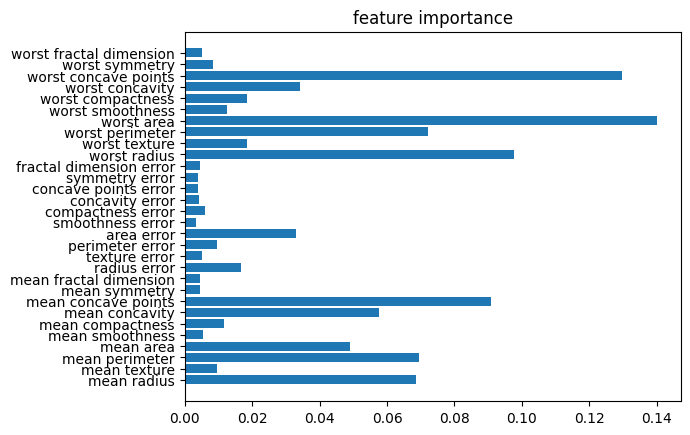

In [ ]:
# plot feature importance
plt.barh(data["feature_names"], rf.feature_importances_)   # Random Forest의 feature importance는
plt.title("feature importance")                            # 각 Decision Tree의 feature importance 평균
plt.show()

**Decision Tree와 비교**

In [ ]:
# make decision tree
dt = DecisionTreeClassifier(criterion='gini', random_state=42)

# fit decision tree
dt.fit(X_train, y_train)

# test decision tree
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"test accuracy : {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

test accuracy : 0.9122807017543859


# **Boosting**

<img src="https://jinsu-l.github.io/assets/post_images/image-20191217222322387.png" width=500>

Boosting은 현재 모델 $A$가 예측했을 때의 오답에 대해 가중치를 더 주고, 가중치가 부여된 데이터를 다음 모델 $B$가 예측하고, 이를 반복하는 기법이다.

이 때, $A$와 $B$를 weak learner라고 한다. 즉, weak learner 여러 개를 더하여 strong learner를 만드는 것이 Boosting이라 할 수 있다.

#### **Boosting 종류**

대표적인 Boosting 알고리즘으로 Adaboost, Gradient Boosting, XGBoost, LightGBM 등이 있다.

- AdaBoost(Adaptive Boosting) : 가장 기본적인 Boosting 알고리즘으로, 가중치를 통해 오차를 줄이는 방식으로 학습한다. (이전 weak learner가 틀렸던 샘플에 가중치를 더 주어 학습을 진행한다.)

- Gradient Boosting : 경사하강법 기법을 사용해 최적화 결과를 얻는다. AdaBoost와 유사하나, **가중치를 통해 오차를 줄이는 방식이 아닌, 잔여 오차를 줄이는 방향으로 학습을 진행한다.**(이전 weak learner의 오차를 데이터로 삼아 새로운 weak learner에 적합시킨 후 합하는 방식이다.)

- XGBoost(Extreme Gradient Boosting) : Gradient Boosting의 단점을 보완하기 위해 만들어진 알고리즘으로, Gradient Boosting과 유사하나, 병렬처리를 통해 속도를 높이고, Regularization을 통해 과적합을 방지한다.

- LightGBM(Light Gradient Boosting Machine) : XGBoost의 단점을 보완하기 위해 만들어진 알고리즘으로, XGBoost와 유사하나, 트리를 분할하는 방식이 다르다. XGBoost는 균형 트리 분할(Level Wise) 방식이고, LightGBM은 리프 중심 트리 분할(Leaf Wise) 방식이다. 즉, 최대손실 값을 가지도록 노드를 분할하기 때문에, 균형 트리 분할 방식보다 더 깊으면서 비대칭적인 트리가 생성된다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

**AdaBoost**<br>
AdaBoostClassifier의 다양한 인자 : [AdaBoost Classifier 공식 문서](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

In [ ]:
# make AdaBoost
ab = AdaBoostClassifier(n_estimators=100,     # 트리의 개수 또는 부스팅 단계 수
                        learning_rate=1,      # 부여되는 가중치 스케일 조절
                        random_state=42)

# fit AdaBoost
ab.fit(X_train, y_train)
print(classification_report(y_test, y_pred))
print(f"test accuracy : {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

test accuracy : 0.9122807017543859


**Gradient Boosting**<br>
GradientBoostingClassifier의 다양한 인자 확인 : [Gradinent Boosting Classifier 공식 문서](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)


In [ ]:
# make gradient boosting
gb = GradientBoostingClassifier(n_estimators=100,     # 트리의 개수 또는 부스팅 단계 수
                                loss="log_loss",      # 최적화할 때 사용하는 손실 함수
                                subsample=0.9,        # 각 트리별로 랜덤으로 샘플링되는 데이터의 비율
                                learning_rate=0.1,    # 각 트리의 기여도 조절
                                random_state=42)

# fit gradient boosting
gb.fit(X_train, y_train)

# test gradient boosting
y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"test accuracy : {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

test accuracy : 0.956140350877193


**XGBoost**<br>
XGBClassifier의 다양한 인자 확인 : [XGBoost 공식 문서](https://xgboost.readthedocs.io/en/stable/python/python_api.html)

In [ ]:
# make XGBoost
xgb = XGBClassifier(n_estimators=100,     # 트리의 개수 또는 부스팅 단계 수
                    learning_rate=0.3,    # 각 트리의 기여도 조절
                    subsample=0.9,        # 각 트리별로 랜덤으로 샘플링되는 데이터의 비율
                    random_state=42)

# fit XGBoost
xgb.fit(X_train, y_train)

# test XGBoost
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"test accuracy : {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

test accuracy : 0.956140350877193


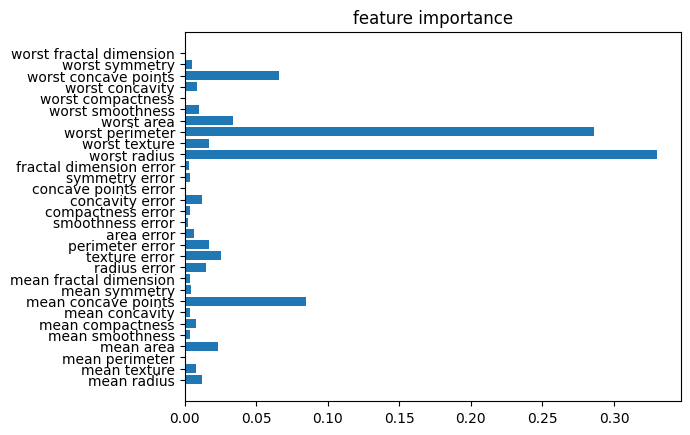

In [ ]:
# plot importance
plt.barh(data["feature_names"], xgb.feature_importances_)
plt.title("feature importance")
plt.show()

**LightGBM**<br>
LGBMClassifier의 다양한 인자 확인 : [LGBM Classifier 공식 문서](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)

In [ ]:
# make LightGBM
lgbm = LGBMClassifier(n_estimators=100,     # 트리의 개수 또는 부스팅 단계 수
                      learning_rate=0.1,    # 각 트리의 기여도 조절
                      subsample=0.9,        # 각 트리별로 랜덤으로 샘플링되는 데이터의 비율
                      verbose=-1,
                      random_state=42)

# fit LightGBM
lgbm.fit(X_train, y_train)

# test LightGBM
y_pred = lgbm.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"test accuracy : {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

test accuracy : 0.9649122807017544


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


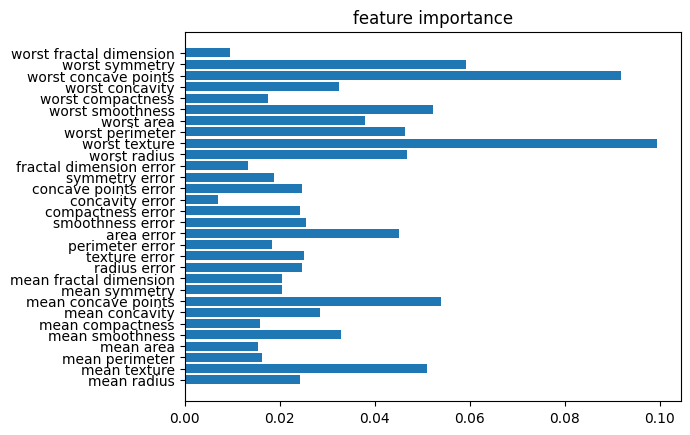

In [ ]:
# plot feature importance
plt.barh(data["feature_names"], lgbm.feature_importances_/sum(lgbm.feature_importances_))
plt.title("feature importance")
plt.show()

# **K-fold Cross Validation**

<img src="https://miro.medium.com/v2/resize:fit:725/1*R5fZ1LkqhzfqPAR9-UGPIQ.png" width=500>

학습 데이터를 K개의 fold로 나눈 후에, K-1개를 모델 훈련에 사용하고 나머지 1개를 모델 검증에 사용한다.<br>
K개의 경우에 대해서 점수를 평균내어 validation score를 얻고,<br>
validation score가 가장 높은 하이퍼파라미터와 함께 전체 학습 데이터로 모델을 다시 훈련시킨 뒤 평가한다.


#### **사용 이유 및 장단점**

- 기존 train/validation/test 로 나누던 데이터를 train/test로 나누다 보니, 모델을 훈련시켰을 때 정확도가 더 높아진다.
- 적은 데이터셋을 가지고 있을 때 유용하다.
- 모델을 훈련시키고 검증하기를 K번 반복해야 하다 보니 시간이 오래 걸린다.

In [ ]:
from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for i, (train_index, val_index) in enumerate(fold.split(X_train, y_train)):
    X_, X_val = X_train[train_index], X_train[val_index]
    y_, y_val = y_train[train_index], y_train[val_index]

    gb = GradientBoostingClassifier(n_estimators=100,
                                    subsample=0.9,
                                    learning_rate=0.1,
                                    random_state=42)
    gb.fit(X_, y_)
    y_pred = gb.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    scores.append(acc)
    print(f"fold {i+1} accuracy: {acc}")

print(f"validation accuracy (mean): {np.mean(scores)}")

fold 1 accuracy: 0.967032967032967
fold 2 accuracy: 0.967032967032967
fold 3 accuracy: 0.945054945054945
fold 4 accuracy: 0.945054945054945
fold 5 accuracy: 0.989010989010989
validation accuracy (mean): 0.9626373626373625


# **Grid Search & Random Search**

<img src="https://www.yourdatateacher.com/wp-content/uploads/2021/03/image-6.png" width=400>

Grid Search는 머신러닝 모델에서 최적의 하이퍼파라미터를 찾기 위한 탐색 방법 중 하나이다.<br>
각 하이퍼파라미터에 대해 탐색하고자 하는 여러 값을 지정한 후 그 모든 조합에 대해 모델을 훈련시키고 검증한다.<br>
모델 검증에서 가장 좋은 결과를 얻은 하이퍼파라미터 조합을 최종적으로 선택한다.<br>



<img src="https://attachments.datarian.io/production-1de2a252-a7cf-4eda-af92-800ce37fab3f-9FaeSamyKJwmuNU3qdZOdNgtUKU2tfDJCIKbIzOocuU.png" width=500>

Grid Search는 모든 조합을 탐색하기 때문에 탐색 공간이 넓어질수록 계산 비용이 커지는 단점이 있다.<br>
이러한 단점을 극복하기 위해서, 무작위로 선택된 하이퍼파라미터 값들을 사용하여 탐색하는 방법인 Random Search도 있다.<br>
Random Search를 이용하게 되면 Grid Search보다 효율적으로 하이퍼파라미터 조합을 탐색할 수 있다.

**Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

# setting params
xgb_params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [1, 3, 5, 7],
    'learning_rate': [0.025, 0.05, 0.075, 0.1],
    'reg_lambda': [0.1, 0.5, 1, 2]
}

# grid search
grid_tree = GridSearchCV(xgb, param_grid=xgb_params,
                         cv=5, refit=True, verbose=1)     # cv는 k-fold cross validaion의 k를 의미함
grid_tree.fit(X_train, y_train)

print(f"Best parameters: {grid_tree.best_params_}")
print(f"Best cross-validation score: {grid_tree.best_score_}")

# test best case
best_estimator = grid_tree.best_estimator_
y_pred = best_estimator.predict(X_test)
print(f"test accuracy : {accuracy_score(y_test, y_pred)}")

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_lambda': 1}
Best cross-validation score: 0.9802197802197803
test accuracy : 0.956140350877193


**Random Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# setting params
xgb_params = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.025, 0.05, 0.075, 0.1, 0.125],
    'reg_lambda': [0.1, 0.5, 1, 1.5, 2]
}

# grid search
random_tree = RandomizedSearchCV(xgb, param_distributions=xgb_params,                         # n_iter는 샘플링되는 하이퍼파라미터 조합의 수를 의미함
                                 cv=5, n_iter=20, refit=True, verbose=1, random_state=42)     # cv는 k-fold cross validaion의 k를 의미함
random_tree.fit(X_train, y_train)

print(f"Best parameters: {random_tree.best_params_}")
print(f"Best cross-validation score: {random_tree.best_score_}")

# test best case
best_estimator = random_tree.best_estimator_
y_pred = best_estimator.predict(X_test)
print(f"test accuracy : {accuracy_score(y_test, y_pred)}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'reg_lambda': 0.1, 'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.1}
Best cross-validation score: 0.9758241758241759
test accuracy : 0.956140350877193
